<a href="https://colab.research.google.com/github/Javiersuing/GitHub/blob/master/AlmacafeDataBase_CrossV_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='white'>  </font>
# <font color='white'>  </font>
# <center>ALMACAFÉ DATA SET</center>

#### This dataset contains the measurements from key features of green coffee beans, as well as the coffee quality score over the coffee cup obtained from them.
### <font color='white'>  </font>

#### Importation of libraries

In [0]:
# This command is needed to visualize correctly the confusion matrix, and the first time is required to restart the Runtime
! pip install matplotlib==3.1.0

In [0]:
# This command allows to work with TensorFlow 1.
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

1.15.0
2.2.4-tf


In [0]:
from numpy import array, dot, random, sign, arange, meshgrid, c_, ones, mean
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import perceptron
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import linear_model
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import scipy.stats as stats
from sklearn import tree
import itertools as it
import seaborn as sns
import pandas as pd
import numpy as np
import argparse
import locale
import os
import glob
import cv2
import time

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils import np_utils

In [0]:
!wget --show-progress --continue -O /content/AlmacafeDataBase.csv https://github.com/Javiersuing/GitHub/raw/master/AlmacafeDataBase.csv
#https://raw.github.com/Javiersuing/GitHub/master/AlmacafeDataBase.csv

--2019-11-07 02:21:28--  https://github.com/Javiersuing/GitHub/raw/master/AlmacafeDataBase.csv
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Javiersuing/GitHub/master/AlmacafeDataBase.csv [following]
--2019-11-07 02:21:28--  https://raw.githubusercontent.com/Javiersuing/GitHub/master/AlmacafeDataBase.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



### <font color='light blue'> Preparación y Análisis de datos </font>

#### 1. Se cargan los datos y se visualizan

In [0]:
df = pd.read_csv("AlmacafeDataBase.csv", sep=";", decimal=",")
#df = pd.read_csv("drive/My Drive/Tesis 2019/AlmacafeDataBase.csv", sep=";", decimal=",")
df = df.drop(["MUESTRA"],axis=1)
display(df.head(3))
print("Dataset dimensions : ", df.shape)

,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,%M 13/64,%M 12/64,%FONDO,GRANOS.G1,PESO.GRANOS.G1,GRANOS.G2,PESO.GRANOS.G2,GRANO.BROC.P,PESO.GRANO.B.P,GRANOS.DEF,PESO.DEF,PORCENTAJE.DEF,ALM.VERD.L*,ALM.VERD.a*,ALM.VERD.b*,ALM.VERD.X,ALM.VERD.Y,ALM.VERD.Z,CAFE.TOS.L*,CAFE.TOS.a*,CAFE.TOS.b*,CAFE.TOS.X,CAFE.TOS.Y,CAFE.TOS.Z,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
0,CUNDINAMARCA,VILLETA,820,11.32,250.38,207.88,16.97,29.09,33.81,24.78,8.25,3.51,0.0,0.54,0.02,5,0.71,33,4.72,0,0.00,38,5.43,2.61,45.42,0.67,15.61,14.18,14.84,9.87,26.75,8.10,13.43,5.40,5.00,2.94,6.5,5.0,4.5,5.5,4.5,5.0,5.5,5.0,5.5,5.0
1,CUNDINAMARCA,FALTANTE,3000,8.74,250.42,206.51,17.53,30.17,32.00,24.40,9.40,2.99,0.0,0.97,0.02,1,0.26,8,1.25,1,0.16,10,1.67,0.81,45.51,1.10,16.35,14.31,14.91,9.68,25.25,7.30,11.79,4.81,4.50,2.80,6.0,6.0,6.0,6.0,5.5,5.5,5.0,5.5,5.5,5.5
2,CUNDINAMARCA,GUADUAS,990,10.57,250.20,208.94,16.49,36.77,35.52,17.81,6.63,2.63,0.0,0.67,0.05,5,0.61,22,3.23,4,0.69,31,4.53,2.17,47.53,1.05,16.21,15.75,16.43,10.90,26.39,8.07,12.93,5.27,4.88,2.92,5.5,4.5,4.0,5.0,4.0,4.5,4.0,4.5,5.0,4.0


Dataset dimensions :  (56, 46)


#### Se visualizan los estadísticos descriptivos

In [0]:
df.describe()

,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,%M 13/64,%M 12/64,%FONDO,GRANOS.G1,PESO.GRANOS.G1,GRANOS.G2,PESO.GRANOS.G2,GRANO.BROC.P,PESO.GRANO.B.P,GRANOS.DEF,PESO.DEF,PORCENTAJE.DEF,ALM.VERD.L*,ALM.VERD.a*,ALM.VERD.b*,ALM.VERD.X,ALM.VERD.Y,ALM.VERD.Z,CAFE.TOS.L*,CAFE.TOS.a*,CAFE.TOS.b*,CAFE.TOS.X,CAFE.TOS.Y,CAFE.TOS.Z,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1628.464286,10.552857,250.437679,206.194821,17.666071,29.866607,30.087857,23.315000,10.631071,4.473036,0.008571,1.474107,0.078571,4.928571,0.518929,31.178571,4.137321,15.125000,2.420179,51.232143,7.076429,3.436429,44.712321,1.257679,15.985893,13.811071,14.358036,9.373393,25.005000,7.657143,12.237321,4.766607,4.427321,2.684821,5.062500,4.982143,4.857143,4.982143,4.821429,4.964286,5.187500,4.803571,5.107143,4.794643
std,555.439775,0.849658,0.289118,2.477325,0.989256,10.999099,3.269189,6.085673,3.621506,1.793525,0.064143,0.892123,0.085183,5.729849,0.582139,19.436710,2.439335,19.599687,3.309120,34.801249,4.783033,2.329430,1.377141,0.347976,0.693271,0.950970,0.985136,0.679945,1.132938,0.376374,0.787762,0.385959,0.359866,0.202269,0.647109,0.768495,0.872375,0.617652,0.844386,0.867898,0.806578,0.993975,0.761066,1.021482
min,820.000000,8.740000,250.030000,200.070000,15.120000,6.740000,22.170000,9.440000,2.890000,0.980000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.390000,0.000000,0.000000,6.000000,0.840000,0.410000,42.170000,0.020000,14.140000,12.110000,12.610000,7.940000,21.080000,6.640000,10.220000,3.500000,3.270000,2.080000,3.500000,3.000000,2.500000,3.000000,3.000000,3.000000,3.500000,2.000000,3.500000,2.000000
25%,1230.000000,10.030000,250.195000,204.477500,17.135000,24.360000,28.140000,19.395000,8.210000,2.987500,0.000000,0.740000,0.015000,0.000000,0.000000,17.750000,2.550000,3.000000,0.450000,25.750000,3.850000,1.880000,43.617500,1.085000,15.625000,13.042500,13.577500,8.887500,24.417500,7.387500,11.850000,4.582500,4.230000,2.557500,5.000000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.375000
50%,1556.500000,10.640000,250.415000,206.005000,17.735000,29.285000,29.710000,22.995000,10.050000,4.695000,0.000000,1.275000,0.050000,3.000000,0.290000,29.000000,3.925000,9.000000,1.315000,46.000000,6.175000,2.965000,44.665000,1.245000,16.120000,13.765000,14.300000,9.395000,25.000000,7.695000,12.315000,4.745000,4.410000,2.720000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.500000,5.000000,5.500000,5.000000
75%,1740.000000,11.050000,250.602500,207.740000,18.342500,37.060000,32.262500,25.022500,12.535000,5.882500,0.000000,2.050000,0.120000,7.250000,0.897500,39.000000,5.002500,21.250000,3.320000,67.000000,9.430000,4.605000,45.450000,1.472500,16.342500,14.270000,14.865000,9.680000,25.775000,7.922500,12.657500,5.025000,4.672500,2.820000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
max,3341.000000,12.880000,251.280000,212.620000,20.070000,60.130000,37.930000,38.680000,19.950000,7.760000,0.480000,3.830000,0.350000,19.000000,1.810000,83.000000,10.750000,117.000000,18.890000,147.000000,20.190000,9.720000,48.000000,1.920000,17.760000,16.140000,16.800000,10.910000,27.150000,8.460000,13.730000,5.490000,5.150000,3.070000,6.500000,6.500000,6.500000,6.000000,6.500000,6.500000,7.000000,7.000000,6.500000,6.500000


In [0]:
#df.dtypes

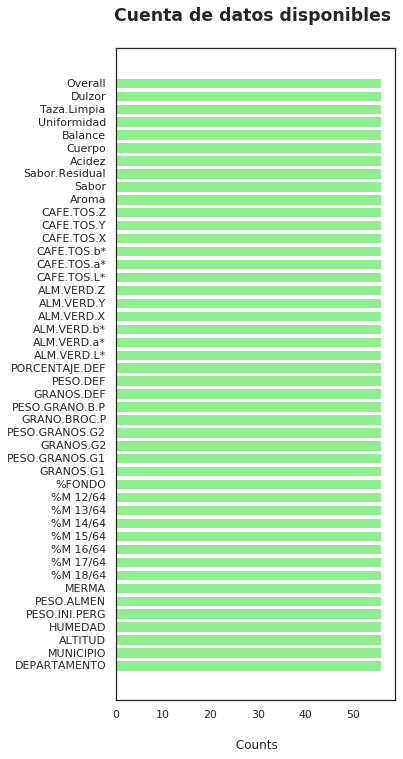

In [0]:
plt.figure(figsize=(5,12))
plt.barh(list(df),df.count(), color="lightgreen")
plt.title("Cuenta de datos disponibles \n",fontsize='x-large',fontweight="bold")
plt.xlabel('\n Counts')
plt.show()

#### Se procede a convertir los datos tipo objeto en númerico asignando un número a cada categoria

In [0]:
for i in df:
    if df[i].dtypes == "object":
        print("%s tiene: "% i,np.size(df[i].unique())," categorias")

DEPARTAMENTO tiene:  4  categorias
MUNICIPIO tiene:  34  categorias


In [0]:
b="DEPARTAMENTO"
i=0
dft = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(df[b].unique()), 2)),columns=[b, 'Número'])
for c in sorted(df[b].unique()):
    dft.loc[i,b]=c
    dft.loc[i,"Número"]=i
    i=i+1
display(dft)
for idx, row in df.iterrows():
    for j in range(len(dft[b])):
        if df.loc[idx,b]==dft.loc[j,b]:
            df.loc[idx,b]=dft.loc[j,"Número"]
            break

,DEPARTAMENTO,Número
0,CAUCA,0
1,CUNDINAMARCA,1
2,QUINDIO,2
3,TOLIMA,3


In [0]:
b="MUNICIPIO"
i=0
dft = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(df[b].unique()), 2)),columns=[b, 'Número'])
for c in sorted(df[b].unique()):
    dft.loc[i,b]=c
    dft.loc[i,"Número"]=i
    i=i+1
display(dft)
for idx, row in df.iterrows():
    for j in range(len(dft[b])):
        if df.loc[idx,b]==dft.loc[j,b]:
            df.loc[idx,b]=dft.loc[j,"Número"]
            break

,MUNICIPIO,Número
0,ARMENIA,0
1,AURES,1
2,CALARCA,2
3,CUNDINAMARCA,3
4,DANTAS,4
5,EL BORDO,5
6,FALTANTE,6
7,FILANDIA,7
8,GENOVA,8
9,GUADUAS,9


In [0]:
display(df.head(3))
print("Dataset dimensions : ", df.shape)

,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,%M 13/64,%M 12/64,%FONDO,GRANOS.G1,PESO.GRANOS.G1,GRANOS.G2,PESO.GRANOS.G2,GRANO.BROC.P,PESO.GRANO.B.P,GRANOS.DEF,PESO.DEF,PORCENTAJE.DEF,ALM.VERD.L*,ALM.VERD.a*,ALM.VERD.b*,ALM.VERD.X,ALM.VERD.Y,ALM.VERD.Z,CAFE.TOS.L*,CAFE.TOS.a*,CAFE.TOS.b*,CAFE.TOS.X,CAFE.TOS.Y,CAFE.TOS.Z,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
0,1,33,820,11.32,250.38,207.88,16.97,29.09,33.81,24.78,8.25,3.51,0.0,0.54,0.02,5,0.71,33,4.72,0,0.00,38,5.43,2.61,45.42,0.67,15.61,14.18,14.84,9.87,26.75,8.10,13.43,5.40,5.00,2.94,6.5,5.0,4.5,5.5,4.5,5.0,5.5,5.0,5.5,5.0
1,1,6,3000,8.74,250.42,206.51,17.53,30.17,32.00,24.40,9.40,2.99,0.0,0.97,0.02,1,0.26,8,1.25,1,0.16,10,1.67,0.81,45.51,1.10,16.35,14.31,14.91,9.68,25.25,7.30,11.79,4.81,4.50,2.80,6.0,6.0,6.0,6.0,5.5,5.5,5.0,5.5,5.5,5.5
2,1,9,990,10.57,250.20,208.94,16.49,36.77,35.52,17.81,6.63,2.63,0.0,0.67,0.05,5,0.61,22,3.23,4,0.69,31,4.53,2.17,47.53,1.05,16.21,15.75,16.43,10.90,26.39,8.07,12.93,5.27,4.88,2.92,5.5,4.5,4.0,5.0,4.0,4.5,4.0,4.5,5.0,4.0


Dataset dimensions :  (56, 46)


#### Se visualizan los histogramas de cada variable

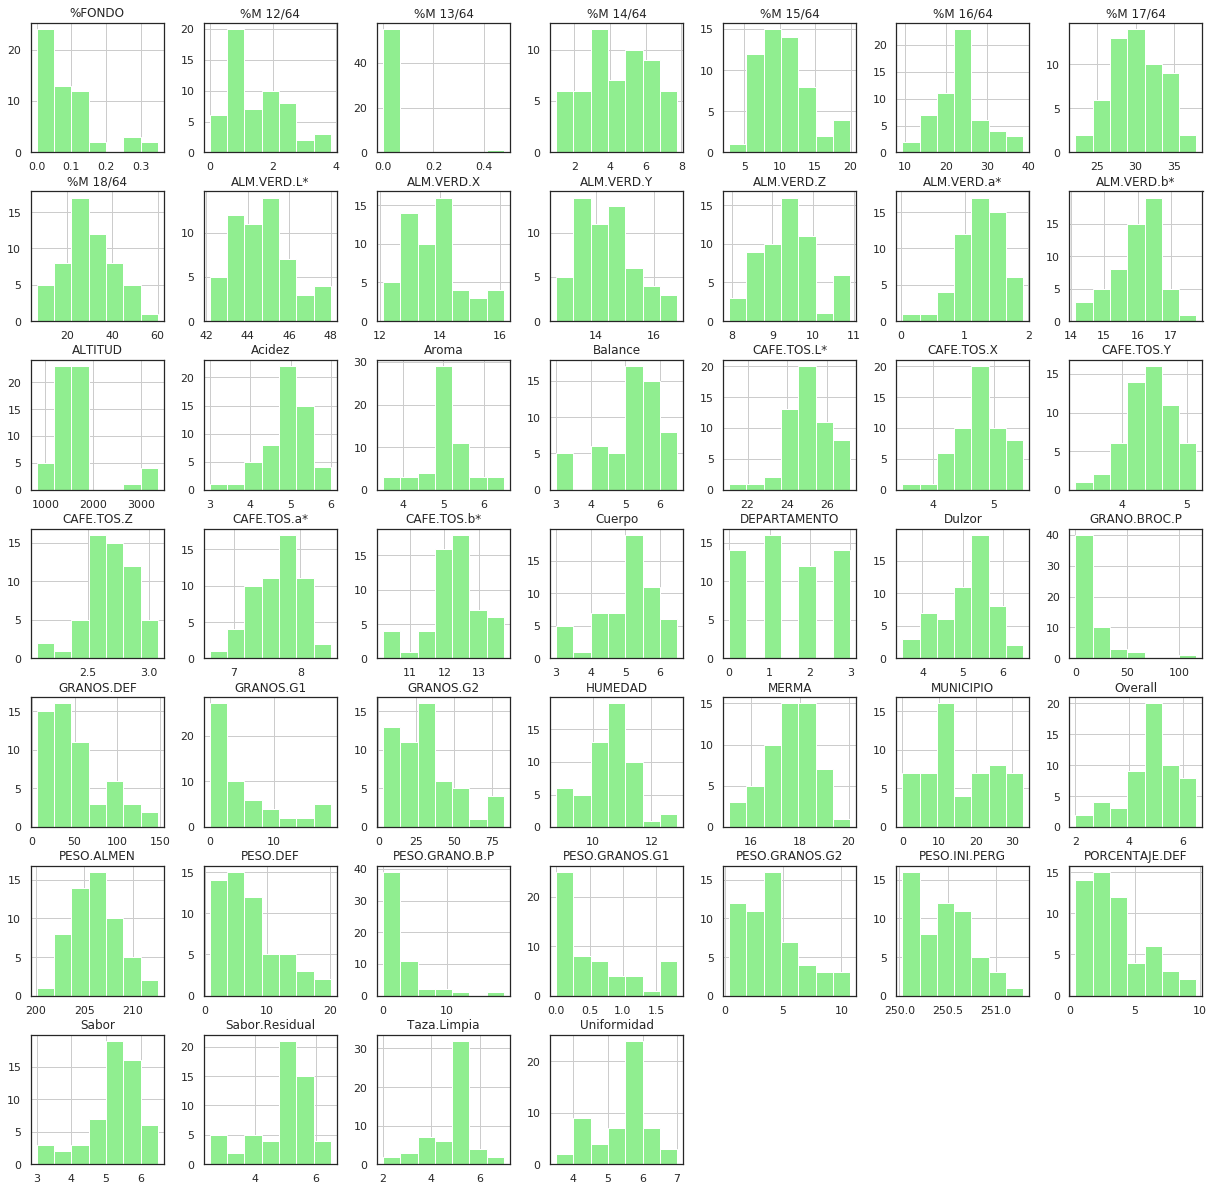

In [0]:
df.hist(bins=7, figsize=(21,21), color = "lightgreen")
plt.show()

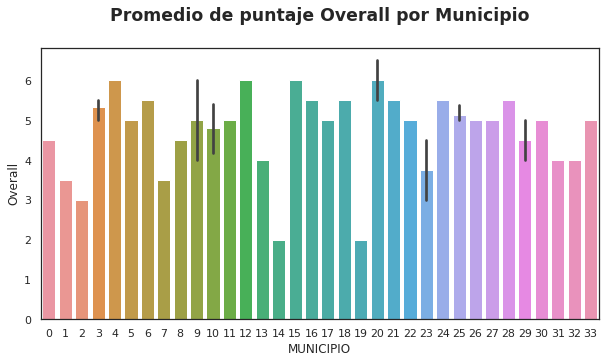

In [0]:
plt.figure(figsize=(10,5))
plt.title("Promedio de puntaje Overall por Municipio\n", fontsize='x-large',fontweight="semibold")
sns.barplot(x=df["MUNICIPIO"], y=df["Overall"])
plt.show()

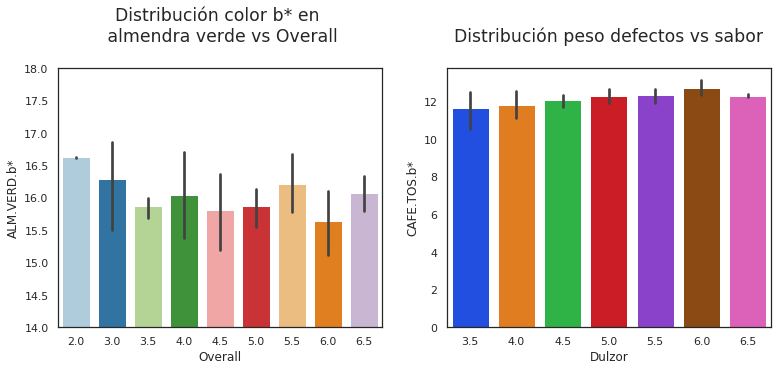

In [0]:
plt.figure(figsize=(11, 4))
plt.subplots_adjust(bottom=.05, top=.95, left=.05, right=.95)
plt.subplot(121)
plt.title("Distribución color b* en \n almendra verde vs Overall\n", fontsize='x-large', fontweight="normal")
sns.barplot(y=df["ALM.VERD.b*"], x=df["Overall"],palette="Paired")
plt.ylim([14,18])
plt.subplot(122)
plt.title("Distribución peso defectos vs sabor\n", fontsize='x-large',fontweight="normal")
sns.barplot(y=df["CAFE.TOS.b*"], x=df["Dulzor"],palette="bright")
plt.show()

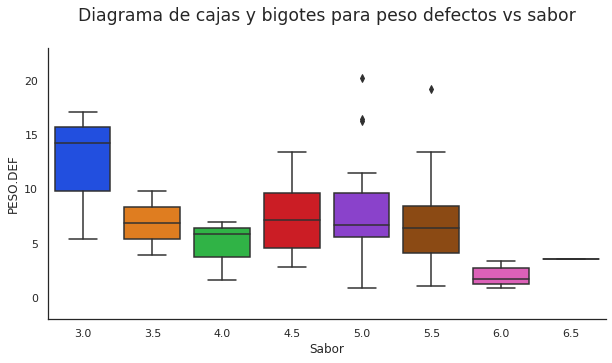

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Diagrama de cajas y bigotes para peso defectos vs sabor\n", fontsize='x-large',fontweight="normal")
sns.boxplot(x=df["Sabor"], y=df["PESO.DEF"], ax=ax, palette="bright")
ax.set_ylim(-2, 23)
sns.despine()

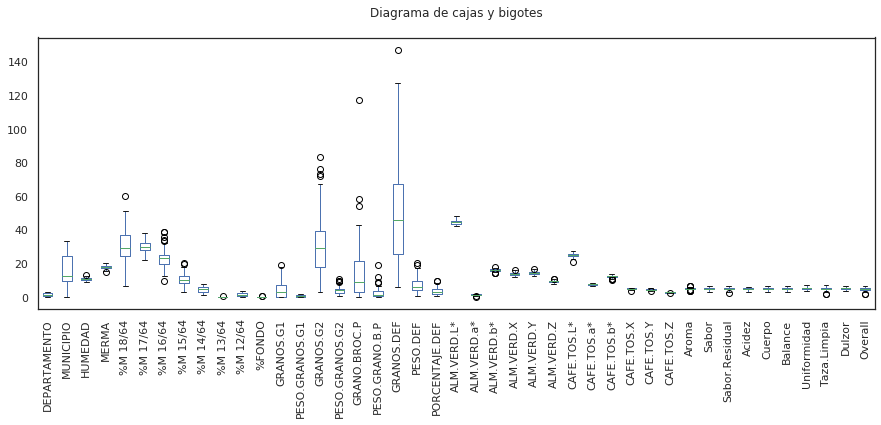

In [0]:
# En este gráfico se aprecia la disperción de los datos y las diferencias de escalas entre ellos.
fig, ax = plt.subplots(figsize=(15, 5))
g=df.drop(["ALTITUD", "PESO.INI.PERG", "PESO.ALMEN"], axis=1).plot(kind="box", sharex=False, sharey=False, title="Diagrama de cajas y bigotes\n", ax=ax)
labels = df.drop(["ALTITUD", "PESO.INI.PERG", "PESO.ALMEN"], axis=1).columns
g.set_xticklabels(labels, rotation=90)
plt.show()

#### Gráficos de correlación

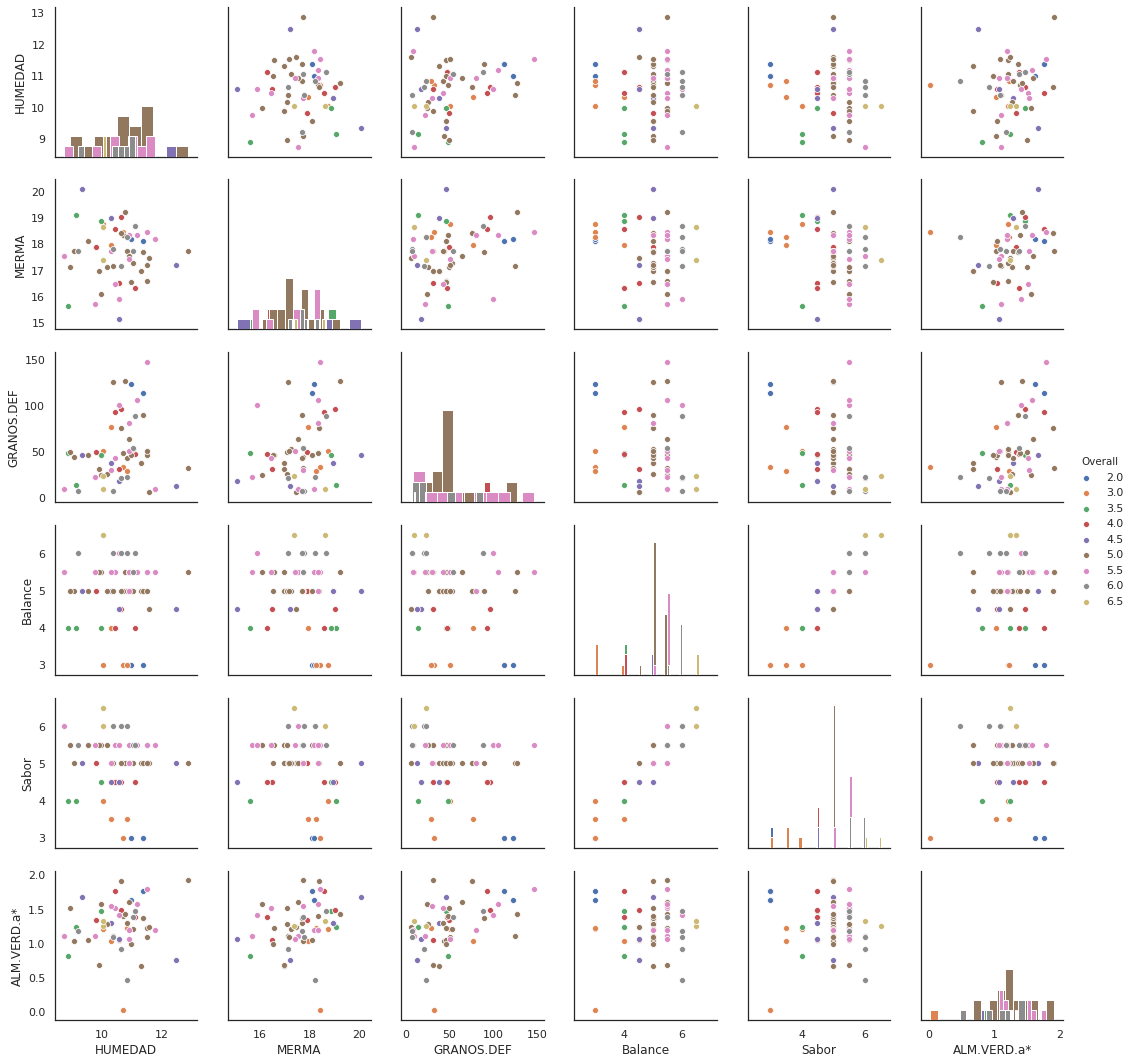

In [0]:
sns.pairplot(vars=["HUMEDAD","MERMA", "GRANOS.DEF","Balance","Sabor", "ALM.VERD.a*"],data=df,diag_kind="hist",hue="Overall")
plt.show()

In [0]:
#sns.pairplot(vars=["DEPARTAMENTO","MUNICIPIO", "ALTITUD","PESO.INI.PERG","PESO.ALMEN", "Sabor"],data=df,diag_kind="hist",hue="Overall")
#plt.show()

In [0]:
#sns.pairplot(vars=["%M 18/64\"","%M 16/64\"", "%M 14/64\"","%M 12/64\"","Balance"],data=df,diag_kind="hist",hue="Overall")
#plt.show()

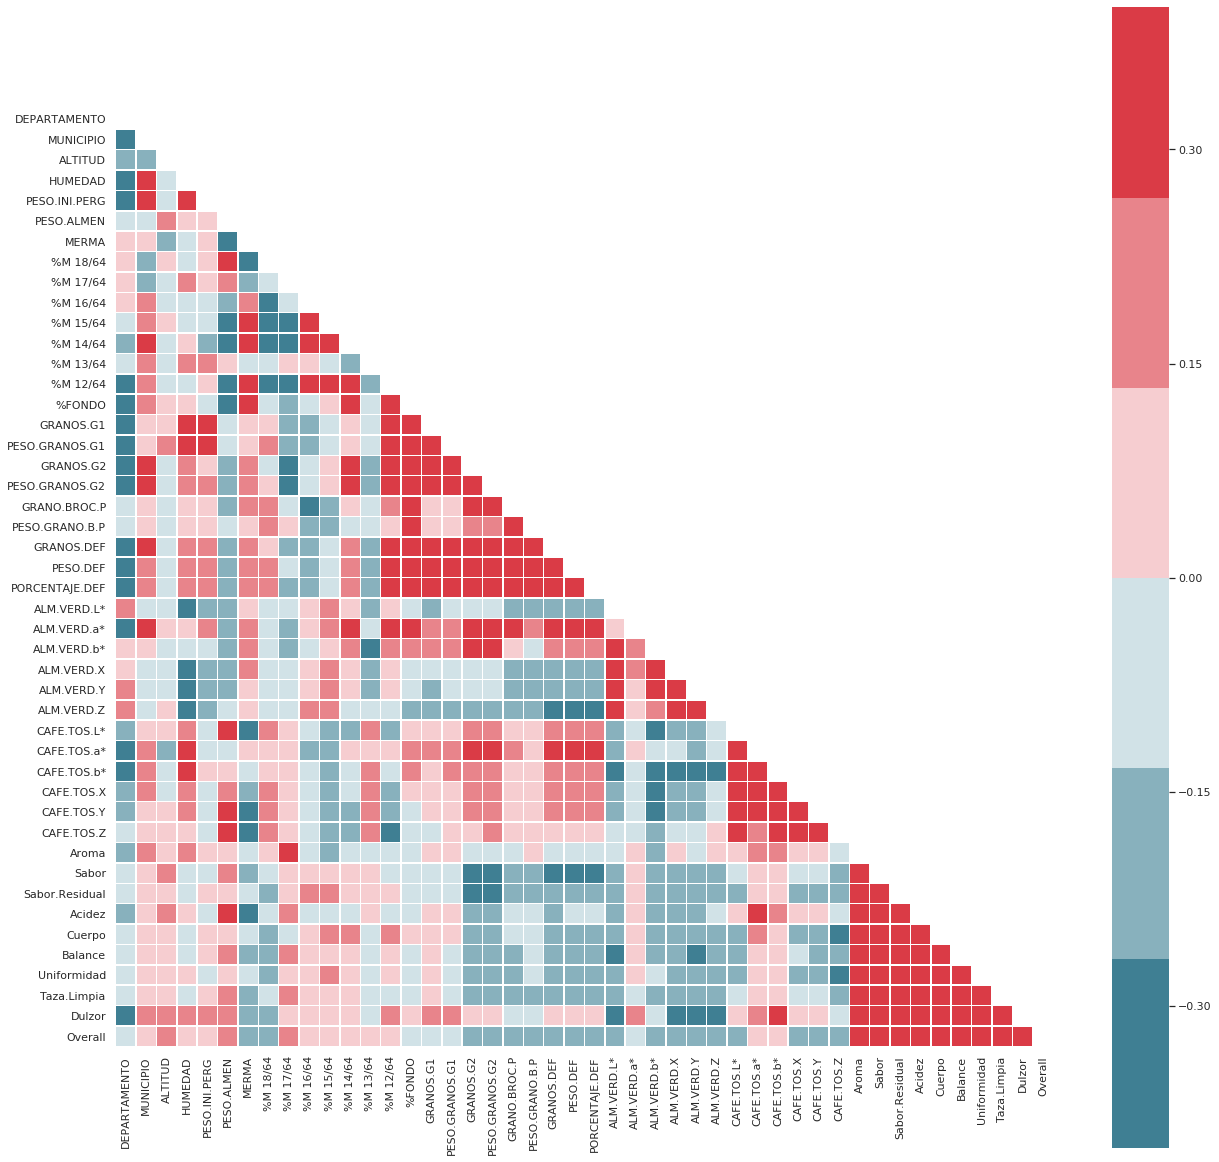

In [0]:
#Mapa de calor de correlación
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21,21))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=False)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.4, vmin=-0.4,
            square=True, linewidths=.5, ax=ax)   
plt.show()

In [0]:
df.corr()

,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,%M 13/64,%M 12/64,%FONDO,GRANOS.G1,PESO.GRANOS.G1,GRANOS.G2,PESO.GRANOS.G2,GRANO.BROC.P,PESO.GRANO.B.P,GRANOS.DEF,PESO.DEF,PORCENTAJE.DEF,ALM.VERD.L*,ALM.VERD.a*,ALM.VERD.b*,ALM.VERD.X,ALM.VERD.Y,ALM.VERD.Z,CAFE.TOS.L*,CAFE.TOS.a*,CAFE.TOS.b*,CAFE.TOS.X,CAFE.TOS.Y,CAFE.TOS.Z,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
DEPARTAMENTO,1.000000,-0.359682,-0.238778,-0.498819,-0.335170,-0.069550,0.037198,0.073620,0.015072,0.000530,-0.054044,-0.186094,-0.056024,-0.319499,-0.345058,-0.594189,-0.581185,-0.528159,-0.533915,-0.089057,-0.124279,-0.442966,-0.429013,-0.428116,0.136169,-0.450857,0.006903,0.109233,0.135381,0.148496,-0.224449,-0.350694,-0.402428,-0.240299,-0.224501,-0.081741,-0.264754,-0.042714,-0.069974,-0.261997,-0.102302,-0.094222,-0.057476,-0.071263,-0.482761,-0.081465
MUNICIPIO,-0.359682,1.000000,-0.214794,0.304160,0.305478,-0.093667,0.123108,-0.173369,-0.160778,0.144760,0.203958,0.326169,0.137670,0.247055,0.244079,0.038918,0.038493,0.380394,0.411874,0.100647,0.050370,0.275544,0.249588,0.250546,-0.018949,0.320871,0.047653,-0.004379,-0.023683,-0.040515,0.119231,0.202709,0.191452,0.135680,0.126201,0.060828,0.220113,0.034458,0.108637,0.004964,0.096393,0.005942,0.108859,0.045710,0.198875,0.029744
ALTITUD,-0.238778,-0.214794,1.000000,-0.069331,-0.101147,0.174651,-0.183995,0.040723,-0.023225,-0.044723,0.016199,-0.075884,-0.031469,-0.058662,0.029469,0.127780,0.168030,-0.062166,-0.076629,-0.089889,-0.070297,-0.064306,-0.067264,-0.068243,-0.018510,0.098698,-0.088110,-0.010420,-0.016511,0.007585,0.005514,-0.203518,-0.026269,-0.009152,0.010508,0.023517,0.123700,0.170613,0.107474,0.258203,0.112274,0.124707,0.076140,0.097797,0.225902,0.133786
HUMEDAD,-0.498819,0.304160,-0.069331,1.000000,0.317136,0.036211,-0.005656,-0.061431,0.248391,-0.018481,-0.042944,0.067878,0.166083,-0.000395,0.066880,0.306956,0.303836,0.203822,0.227065,0.091646,0.103603,0.215988,0.224459,0.224148,-0.281085,0.117652,-0.067806,-0.270668,-0.280055,-0.290755,0.244751,0.437923,0.386687,0.266165,0.242049,0.114811,0.155422,-0.075938,-0.015138,0.025564,-0.007132,-0.022419,0.020429,-0.009980,0.173985,0.020066
PESO.INI.PERG,-0.335170,0.305478,-0.101147,0.317136,1.000000,0.048446,0.047340,0.079554,0.027243,-0.074397,-0.072279,-0.157628,0.241101,0.012895,-0.017043,0.294916,0.269558,0.124480,0.149608,0.125444,0.107258,0.188728,0.183314,0.182278,-0.161577,0.170909,-0.060897,-0.150872,-0.161413,-0.160649,-0.014096,-0.051358,0.063437,-0.021026,-0.015282,-0.054805,0.042092,-0.000190,0.083724,-0.023654,0.016518,0.044226,-0.030066,0.041407,0.178393,0.032217
PESO.ALMEN,-0.069550,-0.093667,0.174651,0.036211,0.048446,1.000000,-0.995408,0.283907,0.181999,-0.231210,-0.301192,-0.403753,0.050264,-0.504570,-0.339452,-0.042129,-0.006414,-0.248660,-0.184596,-0.148332,-0.071151,-0.229354,-0.144149,-0.160795,-0.140515,-0.238220,-0.175711,-0.152985,-0.139124,-0.101627,0.269352,-0.008025,0.117621,0.256714,0.269795,0.284851,0.065704,0.176009,0.103173,0.305321,0.039533,0.146335,0.128658,0.174132,0.240132,0.152073
MERMA,0.037198,0.123108,-0.183995,-0.005656,0.047340,-0.995408,1.000000,-0.276506,-0.179280,0.224150,0.294377,0.389126,-0.026967,0.506150,0.338076,0.069780,0.031602,0.260539,0.198853,0.160838,0.081913,0.247584,0.161932,0.178469,0.125123,0.254866,0.169739,0.138646,0.123758,0.086386,-0.270985,0.003119,-0.111583,-0.258968,-0.271516,-0.290428,-0.061810,-0.176235,-0.095153,-0.307653,-0.037967,-0.142051,-0.131451,-0.170266,-0.222934,-0.148983
%M 18/64,0.073620,-0.173369,0.040723,-0.061431,0.079554,0.283907,-0.276506,1.000000,-0.075080,-0.949059,-0.873009,-0.751823,-0.037316,-0.517714,-0.068007,0.092213,0.146122,-0.009851,0.002642,0.190463,0.192487,0.116947,0.152303,0.148297,-0.094033,-0.095284,-0.009361,-0.096289,-0.091202,-0.100819,0.147688,0.111435,0.095556,0.143598,0.142081,0.139620,0.046049,-0.084068,-0.175676,-0.002404,-0.182688,-0.

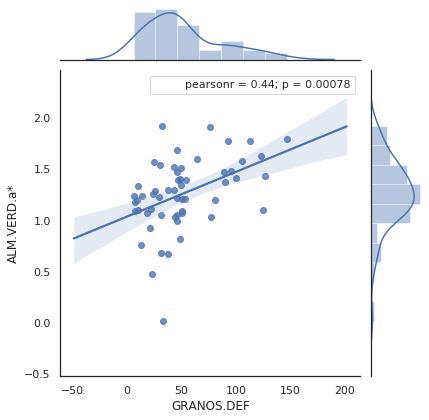

In [0]:
import warnings
warnings.filterwarnings("ignore")
#plt.title("Correlación entre el Aroma y el Cuerpo\n", fontsize='large',fontweight="bold")
sns.jointplot(x="GRANOS.DEF", y="ALM.VERD.a*", data=df, kind="reg", stat_func=pearsonr)

In [0]:
b="Aroma"

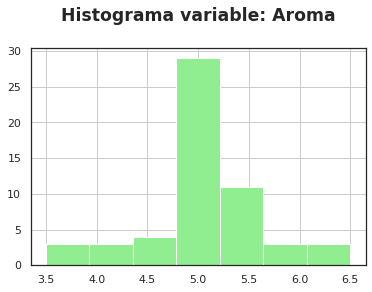

In [0]:
df[b].hist(bins=7, color = "lightgreen")
plt.title("Histograma variable: {}\n".format(b), fontsize='x-large',fontweight="bold")
plt.show()

In [0]:
#"Aroma","Sabor","Sabor.Residual","Acidez","Cuerpo","Balance","Uniformidad","Taza.Limpia","Dulzor","Overall"
df.groupby(b).size()

Aroma
3.5     3
4.0     3
4.5     4
5.0    29
5.5    11
6.0     3
6.5     3
dtype: int64

#### Marco de datos con etiqueta binaria

In [0]:
df5 = df.copy()

In [0]:
df5.head(3)

,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,%M 13/64,%M 12/64,%FONDO,GRANOS.G1,PESO.GRANOS.G1,GRANOS.G2,PESO.GRANOS.G2,GRANO.BROC.P,PESO.GRANO.B.P,GRANOS.DEF,PESO.DEF,PORCENTAJE.DEF,ALM.VERD.L*,ALM.VERD.a*,ALM.VERD.b*,ALM.VERD.X,ALM.VERD.Y,ALM.VERD.Z,CAFE.TOS.L*,CAFE.TOS.a*,CAFE.TOS.b*,CAFE.TOS.X,CAFE.TOS.Y,CAFE.TOS.Z,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall
0,1,33,820,11.32,250.38,207.88,16.97,29.09,33.81,24.78,8.25,3.51,0.0,0.54,0.02,5,0.71,33,4.72,0,0.00,38,5.43,2.61,45.42,0.67,15.61,14.18,14.84,9.87,26.75,8.10,13.43,5.40,5.00,2.94,6.5,5.0,4.5,5.5,4.5,5.0,5.5,5.0,5.5,5.0
1,1,6,3000,8.74,250.42,206.51,17.53,30.17,32.00,24.40,9.40,2.99,0.0,0.97,0.02,1,0.26,8,1.25,1,0.16,10,1.67,0.81,45.51,1.10,16.35,14.31,14.91,9.68,25.25,7.30,11.79,4.81,4.50,2.80,6.0,6.0,6.0,6.0,5.5,5.5,5.0,5.5,5.5,5.5
2,1,9,990,10.57,250.20,208.94,16.49,36.77,35.52,17.81,6.63,2.63,0.0,0.67,0.05,5,0.61,22,3.23,4,0.69,31,4.53,2.17,47.53,1.05,16.21,15.75,16.43,10.90,26.39,8.07,12.93,5.27,4.88,2.92,5.5,4.5,4.0,5.0,4.0,4.5,4.0,4.5,5.0,4.0


In [0]:
columns2 = ["Aroma","Sabor","Sabor.Residual","Acidez","Cuerpo","Balance","Uniformidad","Taza.Limpia","Dulzor","Overall"] 
df5["Suma"]=df5[columns2].sum(axis=1)
df5.head(3)

,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,%M 13/64,%M 12/64,%FONDO,GRANOS.G1,PESO.GRANOS.G1,GRANOS.G2,PESO.GRANOS.G2,GRANO.BROC.P,PESO.GRANO.B.P,GRANOS.DEF,PESO.DEF,PORCENTAJE.DEF,ALM.VERD.L*,ALM.VERD.a*,ALM.VERD.b*,ALM.VERD.X,ALM.VERD.Y,ALM.VERD.Z,CAFE.TOS.L*,CAFE.TOS.a*,CAFE.TOS.b*,CAFE.TOS.X,CAFE.TOS.Y,CAFE.TOS.Z,Aroma,Sabor,Sabor.Residual,Acidez,Cuerpo,Balance,Uniformidad,Taza.Limpia,Dulzor,Overall,Suma
0,1,33,820,11.32,250.38,207.88,16.97,29.09,33.81,24.78,8.25,3.51,0.0,0.54,0.02,5,0.71,33,4.72,0,0.00,38,5.43,2.61,45.42,0.67,15.61,14.18,14.84,9.87,26.75,8.10,13.43,5.40,5.00,2.94,6.5,5.0,4.5,5.5,4.5,5.0,5.5,5.0,5.5,5.0,52.0
1,1,6,3000,8.74,250.42,206.51,17.53,30.17,32.00,24.40,9.40,2.99,0.0,0.97,0.02,1,0.26,8,1.25,1,0.16,10,1.67,0.81,45.51,1.10,16.35,14.31,14.91,9.68,25.25,7.30,11.79,4.81,4.50,2.80,6.0,6.0,6.0,6.0,5.5,5.5,5.0,5.5,5.5,5.5,56.5
2,1,9,990,10.57,250.20,208.94,16.49,36.77,35.52,17.81,6.63,2.63,0.0,0.67,0.05,5,0.61,22,3.23,4,0.69,31,4.53,2.17,47.53,1.05,16.21,15.75,16.43,10.90,26.39,8.07,12.93,5.27,4.88,2.92,5.5,4.5,4.0,5.0,4.0,4.5,4.0,4.5,5.0,4.0,45.0


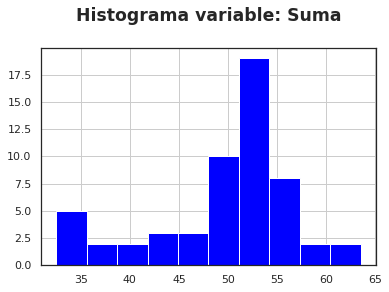

In [0]:
df5["Suma"].hist(bins=10, color = "blue")
plt.title("Histograma variable: {}\n".format("Suma"), fontsize='x-large',fontweight="bold")
plt.show()

In [0]:
# Se crea un bucle para crear una columna con las etiquetas definidas:
# 1 para Alta y 0 para Baja calidad.

for i in range(len(df5)):
    df5.loc[i,"label"] = 1 if df5.loc[i,"Suma"] >51.5 else 0

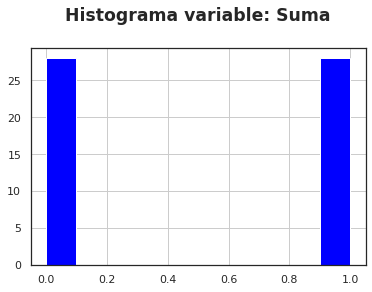

In [0]:
df5["label"].hist(bins=10, color = "blue")
plt.title("Histograma variable: {}\n".format("Suma"), fontsize='x-large',fontweight="bold")
plt.show()

In [0]:
#Se retiran la columna "Suma"y los 10 descriptores de calidad, para dejar solo la columna "label" como variable de salida.
df5 = df5.drop(["Aroma","Sabor","Sabor.Residual","Acidez","Cuerpo","Balance","Uniformidad","Taza.Limpia","Dulzor","Overall", "Suma"],axis=1)
display(df5.head(3))
print("Dataset dimensions : ", df5.shape)

,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,%M 13/64,%M 12/64,%FONDO,GRANOS.G1,PESO.GRANOS.G1,GRANOS.G2,PESO.GRANOS.G2,GRANO.BROC.P,PESO.GRANO.B.P,GRANOS.DEF,PESO.DEF,PORCENTAJE.DEF,ALM.VERD.L*,ALM.VERD.a*,ALM.VERD.b*,ALM.VERD.X,ALM.VERD.Y,ALM.VERD.Z,CAFE.TOS.L*,CAFE.TOS.a*,CAFE.TOS.b*,CAFE.TOS.X,CAFE.TOS.Y,CAFE.TOS.Z,label
0,1,33,820,11.32,250.38,207.88,16.97,29.09,33.81,24.78,8.25,3.51,0.0,0.54,0.02,5,0.71,33,4.72,0,0.00,38,5.43,2.61,45.42,0.67,15.61,14.18,14.84,9.87,26.75,8.10,13.43,5.40,5.00,2.94,1.0
1,1,6,3000,8.74,250.42,206.51,17.53,30.17,32.00,24.40,9.40,2.99,0.0,0.97,0.02,1,0.26,8,1.25,1,0.16,10,1.67,0.81,45.51,1.10,16.35,14.31,14.91,9.68,25.25,7.30,11.79,4.81,4.50,2.80,1.0
2,1,9,990,10.57,250.20,208.94,16.49,36.77,35.52,17.81,6.63,2.63,0.0,0.67,0.05,5,0.61,22,3.23,4,0.69,31,4.53,2.17,47.53,1.05,16.21,15.75,16.43,10.90,26.39,8.07,12.93,5.27,4.88,2.92,0.0


Dataset dimensions :  (56, 37)


In [0]:
# Se crea una versión normalizada del df5
df7 = df5.copy()
x = df5.to_numpy(copy=True)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
df6=pd.DataFrame(x_scaled)
for column in list(df6):
    df7[df7.columns[int(column)]]=df6[column].tolist()
print("Normalized Dataset dimensions : ", df7.shape)
df7.head(3)

Normalized Dataset dimensions :  (56, 37)


,DEPARTAMENTO,MUNICIPIO,ALTITUD,HUMEDAD,PESO.INI.PERG,PESO.ALMEN,MERMA,%M 18/64,%M 17/64,%M 16/64,%M 15/64,%M 14/64,%M 13/64,%M 12/64,%FONDO,GRANOS.G1,PESO.GRANOS.G1,GRANOS.G2,PESO.GRANOS.G2,GRANO.BROC.P,PESO.GRANO.B.P,GRANOS.DEF,PESO.DEF,PORCENTAJE.DEF,ALM.VERD.L*,ALM.VERD.a*,ALM.VERD.b*,ALM.VERD.X,ALM.VERD.Y,ALM.VERD.Z,CAFE.TOS.L*,CAFE.TOS.a*,CAFE.TOS.b*,CAFE.TOS.X,CAFE.TOS.Y,CAFE.TOS.Z,label
0,0.333333,1.000000,0.000000,0.623188,0.280,0.622311,0.373737,0.418618,0.738579,0.524624,0.314185,0.373156,0.0,0.140992,0.057143,0.263158,0.392265,0.3750,0.417954,0.000000,0.000000,0.226950,0.237209,0.236305,0.557461,0.342105,0.406077,0.513648,0.532220,0.649832,0.934102,0.802198,0.914530,0.954774,0.920213,0.868687,1.0
1,0.333333,0.181818,0.864736,0.000000,0.312,0.513147,0.486869,0.438846,0.623731,0.511628,0.381594,0.296460,0.0,0.253264,0.057143,0.052632,0.143646,0.0625,0.083012,0.008547,0.008470,0.028369,0.042894,0.042965,0.572899,0.568421,0.610497,0.545906,0.548926,0.585859,0.686985,0.362637,0.447293,0.658291,0.654255,0.727273,1.0
2,0.333333,0.272727,0.067434,0.442029,0.136,0.706773,0.276768,0.562465,0.847081,0.286252,0.219226,0.243363,0.0,0.174935,0.142857,0.263158,0.337017,0.2375,0.274131,0.034188,0.036527,0.177305,0.190698,0.189044,0.919383,0.542105,0.571823,0.903226,0.911695,0.996633,0.874794,0.785714,0.772080,0.889447,0.856383,0.848485,0.0


In [0]:
#A copy for SVC with PCA
dfc = df5.copy()

#### .

### <font color='light blue'> Supervised analysis (classification) </font>

#### Data split

In [0]:
y=df5["label"].values
X=df5.drop(["label"], axis=1).values
print(np.shape(X))

(56, 36)


In [0]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, y, test_size=0.2,random_state=4)
print(np.shape(X_trn),np.shape(X_tst))
print("\n Y_tst:\n",Y_tst, "\n y:\n", y)

(44, 36) (12, 36)

 Y_tst:
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.] 
 y:
 [1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]


In [0]:
#Función para gráficar la matriz de confusión
import itertools as it
def conf_graph(Y_tst, Y_pred, y, dataset,k): 
    cm = confusion_matrix(Y_tst, Y_pred)
    cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plt.imshow(cm, interpolation="nearest", cmap="winter")
    plt.title("Confusion matrix on data set (k=%d): %s \n" % (k, dataset), fontsize='large', fontweight="normal")
    plt.colorbar()
    classes = np.unique(y)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()/2
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], ".2f"), horizontalalignment="center", fontsize='large', color="white" if cm[i,j]<thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    return plt.figure()

#### SVC

In [0]:
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from time import time

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_trn, Y_trn)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 0.189s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


0.8333333333333334

 SVC confusion matrix: 

 [[6 0]
 [2 4]]


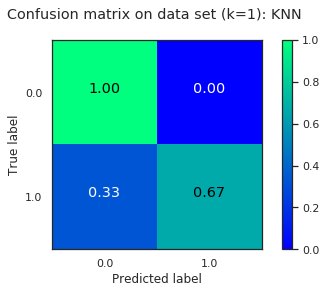


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         6
         1.0       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



<Figure size 432x288 with 0 Axes>

In [0]:
k=1
clf.fit(X_trn, Y_trn)
Y_pred = clf.predict(X_tst)
print(clf.score(X_tst, Y_tst))
print("\n SVC confusion matrix: \n\n", confusion_matrix(Y_tst, Y_pred))
conf_graph(Y_tst, Y_pred, Y_tst, "KNN",k);
print("\n SVC Classification report: \n\n", classification_report(Y_tst, Y_pred))

#### Stratified Cross Validation for SVC

[ 5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [0 1 2 3 4 8]
[1. 1. 0. 1. 0. 0.]
Fitting the classifier to the training set 1
done in 0.189s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.5

 SVC confusion matrix: 

 [[2 1]
 [2 1]]


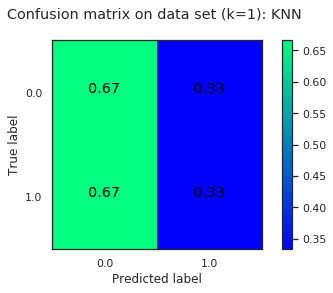


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         3
         1.0       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6


 Next iteration 

[ 0  1  2  3  4  8  9 10 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [ 5  6  7 11 12 13]
[1. 1. 1. 0. 0. 0.]
Fitting the classifier to the training set 2
done in 0.180s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.6666666666666666

 SVC confusion matrix: 

 [[3 0]
 [2 1]]


<Figure size 432x288 with 0 Axes>

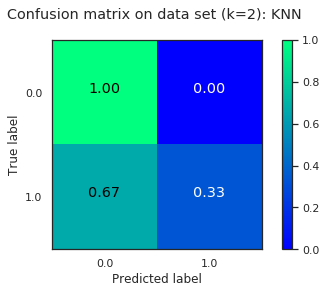


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8 11 12 13 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [ 9 10 14 15 16 17]
[1. 1. 0. 0. 0. 1.]
Fitting the classifier to the training set 3
done in 0.190s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.5

 SVC confusion matrix: 

 [[2 1]
 [2 1]]


<Figure size 432x288 with 0 Axes>

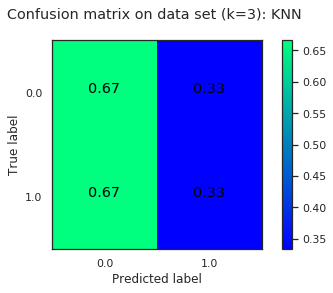


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         3
         1.0       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 23 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [18 19 20 21 22 24]
[0. 1. 1. 0. 1. 0.]
Fitting the classifier to the training set 4
done in 0.182s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.6666666666666666

 SVC confusion matrix: 

 [[3 0]
 [2 1]]


<Figure size 432x288 with 0 Axes>

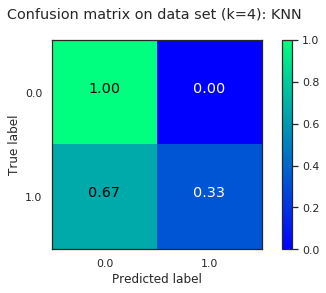


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 28 29 30 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [23 25 26 27 31 32]
[1. 0. 0. 0. 1. 1.]
Fitting the classifier to the training set 5
done in 0.183s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8333333333333334

 SVC confusion matrix: 

 [[3 0]
 [1 2]]


<Figure size 432x288 with 0 Axes>

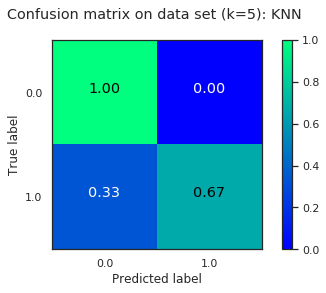


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 31 32 34 35 36 37 38 40 41 43 44 45 46 47 48 49 50 51 52 53
 54 55] [28 29 30 33 39 42]
[0. 0. 0. 1. 1. 1.]
Fitting the classifier to the training set 6
done in 0.188s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8333333333333334

 SVC confusion matrix: 

 [[3 0]
 [1 2]]


<Figure size 432x288 with 0 Axes>

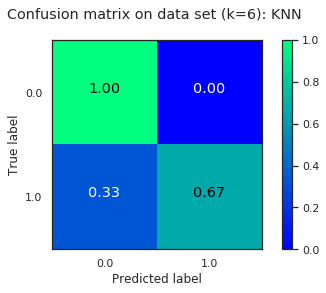


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 37 38 39 40 41 42 44 46 48 49 50 51 52 53
 54 55] [34 35 36 43 45 47]
[0. 0. 0. 1. 1. 1.]
Fitting the classifier to the training set 7
done in 0.183s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
1.0

 SVC confusion matrix: 

 [[3 0]
 [0 3]]


<Figure size 432x288 with 0 Axes>

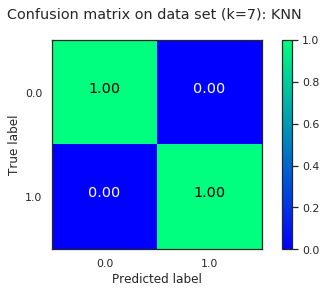


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 39 41 42 43 44 45 46 47 51 52 53
 54 55] [37 38 40 48 49 50]
[0. 0. 0. 1. 1. 1.]
Fitting the classifier to the training set 8
done in 0.197s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.16666666666666666

 SVC confusion matrix: 

 [[0 3]
 [2 1]]


<Figure size 432x288 with 0 Axes>

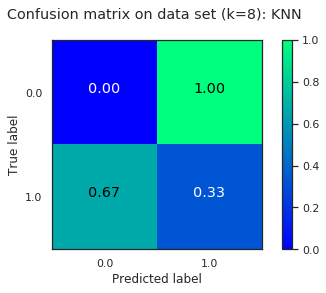


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.25      0.33      0.29         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 45 46 47 48 49
 50 53 54 55] [41 44 51 52]
[0. 0. 1. 1.]
Fitting the classifier to the training set 9
done in 0.183s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.5

 SVC confusion matrix: 

 [[2 0]
 [2 0]]


<Figure size 432x288 with 0 Axes>

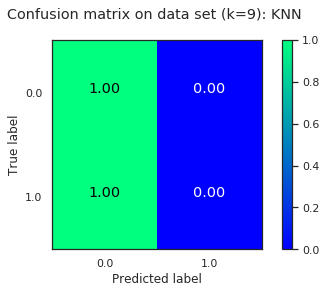


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         2
         1.0       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52] [46 53 54 55]
[0. 1. 1. 0.]
Fitting the classifier to the training set 10
done in 0.179s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.75

 SVC confusion matrix: 

 [[1 1]
 [0 2]]


<Figure size 432x288 with 0 Axes>

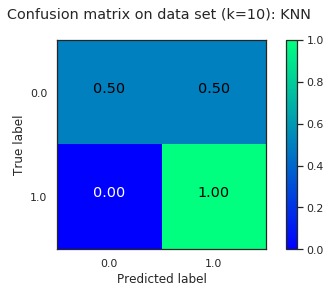


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


 Next iteration 



<Figure size 432x288 with 0 Axes>

In [0]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
i=1
for train, test in skf.split(X, y):
  print("%s %s" % (train, test))
  X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
  print(y_test)

  print("Fitting the classifier to the training set %d"%i)
  t0 = time()
  param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
  clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                    param_grid, cv=5, iid=False)
  clf = clf.fit(X_train, y_train)
  print("done in %0.3fs" % (time() - t0))
  print("Best estimator found by grid search:")
  print(clf.best_estimator_)

  k=i
  clf.fit(X_train, y_train)
  Y_pred = clf.predict(X_test)
  print(clf.score(X_test, y_test))
  print("\n SVC confusion matrix: \n\n", confusion_matrix(y_test, Y_pred))
  conf_graph(y_test, Y_pred, y_test, "KNN",k);
  print("\n SVC Classification report: \n\n", classification_report(y_test, Y_pred))

  print("\n Next iteration \n")
  i=i+1

#### PCA for SVC

In [0]:
y=dfc["label"].values
X=dfc.drop(["label"], axis=1).values
print(np.shape(X))

(56, 36)


In [0]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, y, test_size=0.2,random_state=4)
print(np.shape(X_trn),np.shape(X_tst))
#print("\n Y_tst:\n",Y_tst, "\n y:\n", y)

(44, 36) (12, 36)


In [0]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
from sklearn.decomposition import PCA

n_components = 5

print("Extracting the top %d eigenfaces from %d examples"
      % (n_components, X_trn.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='auto',
          whiten=True).fit(X_trn)
print("done in %0.3fs" % (time() - t0))

Extracting the top 5 eigenfaces from 44 examples
done in 0.041s


In [0]:
np.shape(pca.components_)

(5, 36)

In [0]:
eigenfaces = pca.components_.reshape((n_components, X_trn.shape[1]))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_trn)
X_test_pca = pca.transform(X_tst)
print("done in %0.3fs" % (time() - t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.001s


In [0]:
print(np.shape(X_train_pca))
print(np.shape(X_test_pca))

(44, 5)
(12, 5)


In [0]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, Y_trn)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 0.362s
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
#Returns the coefficient of determination R^2 of the prediction
clf.score(X_test_pca, Y_tst)

0.75

In [0]:
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(Y_tst, y_pred))
print(confusion_matrix(Y_tst, y_pred, labels=range(len(dfc.label.unique()))))

Predicting people's names on the test set
done in 0.000s
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         6
         1.0       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[3 3]
 [0 6]]


#### Stratified Cross Validation with PCA and SVC

[ 5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [0 1 2 3 4 8]
[1. 1. 0. 1. 0. 0.]
Extracting the top 5 eigenfaces from 50 examples
done in 0.001s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 1
done in 0.406s
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 SVC confusion matrix: 

 [[1 2]
 [1 2]]


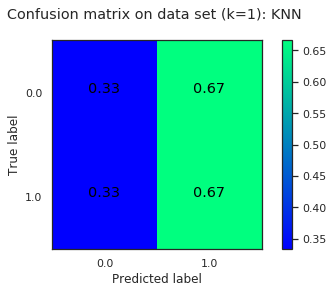


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.50      0.33      0.40         3
         1.0       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6


 Next iteration 

[ 0  1  2  3  4  8  9 10 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [ 5  6  7 11 12 13]
[1. 1. 1. 0. 0. 0.]
Extracting the top 5 eigenfaces from 50 examples
done in 0.001s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 2
done in 0.497s
Best estimator found by grid search:
SVC(C=50000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=Non

<Figure size 432x288 with 0 Axes>

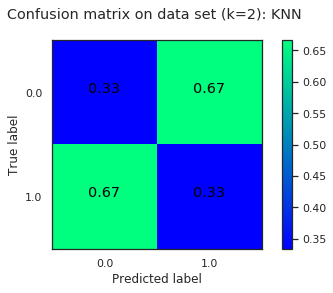


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         3
         1.0       0.33      0.33      0.33         3

    accuracy                           0.33         6
   macro avg       0.33      0.33      0.33         6
weighted avg       0.33      0.33      0.33         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8 11 12 13 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [ 9 10 14 15 16 17]
[1. 1. 0. 0. 0. 1.]
Extracting the top 5 eigenfaces from 50 examples
done in 0.001s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 3
done in 0.421s
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=Non

<Figure size 432x288 with 0 Axes>

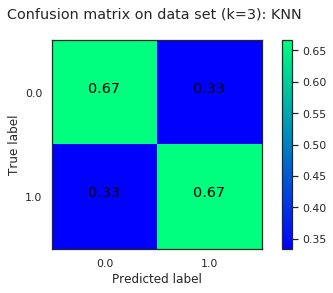


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         3
         1.0       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 23 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [18 19 20 21 22 24]
[0. 1. 1. 0. 1. 0.]
Extracting the top 5 eigenfaces from 50 examples
done in 0.001s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 4
done in 0.441s
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None

<Figure size 432x288 with 0 Axes>

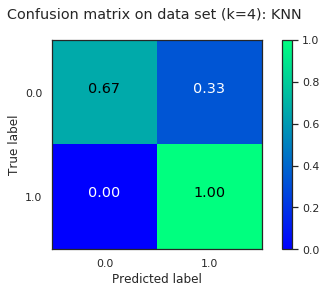


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 28 29 30 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [23 25 26 27 31 32]
[1. 0. 0. 0. 1. 1.]
Extracting the top 5 eigenfaces from 50 examples
done in 0.001s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 5
done in 0.400s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None,

<Figure size 432x288 with 0 Axes>

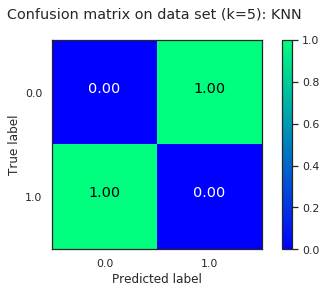


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       3.0
         1.0       0.00      0.00      0.00       3.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 31 32 34 35 36 37 38 40 41 43 44 45 46 47 48 49 50 51 52 53
 54 55] [28 29 30 33 39 42]
[0. 0. 0. 1. 1. 1.]
Extracting the top 5 eigenfaces from 50 examples
done in 0.001s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 6
done in 0.440s
Best estimator found by grid search:
SVC(C=100000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=N

<Figure size 432x288 with 0 Axes>

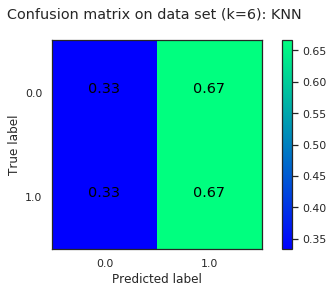


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.50      0.33      0.40         3
         1.0       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 37 38 39 40 41 42 44 46 48 49 50 51 52 53
 54 55] [34 35 36 43 45 47]
[0. 0. 0. 1. 1. 1.]
Extracting the top 5 eigenfaces from 50 examples
done in 0.002s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 7
done in 0.473s
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None

<Figure size 432x288 with 0 Axes>

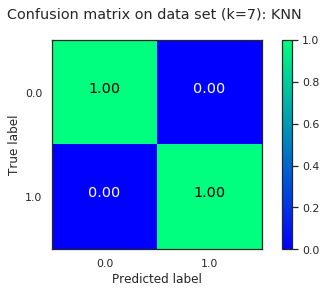


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 39 41 42 43 44 45 46 47 51 52 53
 54 55] [37 38 40 48 49 50]
[0. 0. 0. 1. 1. 1.]
Extracting the top 5 eigenfaces from 50 examples
done in 0.001s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 8
done in 0.443s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None

<Figure size 432x288 with 0 Axes>

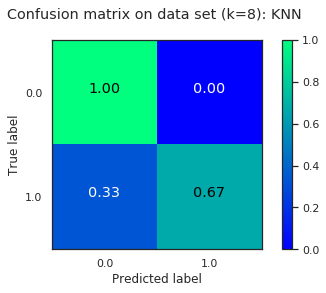


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 45 46 47 48 49
 50 53 54 55] [41 44 51 52]
[0. 0. 1. 1.]
Extracting the top 5 eigenfaces from 52 examples
done in 0.001s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 9
done in 0.414s
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shri

<Figure size 432x288 with 0 Axes>

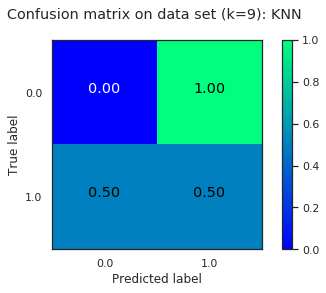


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52] [46 53 54 55]
[0. 1. 1. 0.]
Extracting the top 5 eigenfaces from 52 examples
done in 0.002s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s
Fitting the classifier to the training set 10
done in 0.435s
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shr

<Figure size 432x288 with 0 Axes>

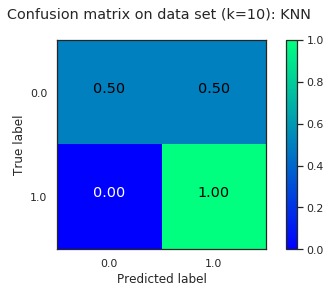


 SVC Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


 Next iteration 



<Figure size 432x288 with 0 Axes>

In [0]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
i=1
for train, test in skf.split(X, y):
  print("%s %s" % (train, test))
  X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
  print(y_test)

  from sklearn.decomposition import PCA
  n_components = 5

  print("Extracting the top %d eigenfaces from %d examples"
        % (n_components, X_train.shape[0]))
  t0 = time()
  pca = PCA(n_components=n_components, svd_solver='auto',
            whiten=True).fit(X_train)
  print("done in %0.3fs" % (time() - t0))  
  
  eigenfaces = pca.components_.reshape((n_components, X_train.shape[1]))

  print("Projecting the input data on the eigenfaces orthonormal basis")
  t0 = time()
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  print("done in %0.3fs" % (time() - t0))

  print("Fitting the classifier to the training set %d"%i)
  t0 = time()
  param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
  clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                    param_grid, cv=5, iid=False)
  clf = clf.fit(X_train_pca, y_train)
  print("done in %0.3fs" % (time() - t0))
  print("Best estimator found by grid search:")
  print(clf.best_estimator_)

  y_pred = clf.predict(X_test_pca)
  k=i
  print("\n SVC confusion matrix: \n\n", confusion_matrix(y_test, y_pred, labels=range(len(dfc.label.unique()))))
  conf_graph(y_test, y_pred, y_test, "KNN",k);
  print("\n SVC Classification report: \n\n", classification_report(y_test, y_pred))

  print("\n Next iteration \n")
  i=i+1

#### Neuronal Network (classification)

In [0]:
#Esta función permite gráficar las epocas de aprendizaje del modelo

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],
           label='Acc')
    plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Acc')
    plt.ylim([0,1.2])
    plt.legend()

    plt.show()

In [0]:
def plot_training_history(history):
    # Get the classification accuracy and loss-value
    # for the training-set.
    acc = history.history['acc']
    loss = history.history['loss']

    # Get it for the validation-set (we only use the test-set).
    val_acc = history.history['val_acc']
    val_loss = history.history['val_loss']

    # Plot the accuracy and loss-values for the training-set.
    plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
    plt.plot(loss, linestyle='--', color='b', label='Training Loss')
    
    # Plot it for the test-set.
    plt.plot(val_acc, color='r', label='Test Acc.')
    plt.plot(val_loss, linestyle='--', color='r', label='Test Loss')

    # Plot title and legend.
    plt.title('Training and Test Accuracy')
    plt.legend(bbox_to_anchor=(1.35, 0.5))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')

    # Ensure the plot shows correctly.
    plt.show()

In [0]:
y=df7["label"].values
X=df7.drop(["label"], axis=1).values
print(np.shape(X))

(56, 36)


In [0]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, y, test_size=0.2,random_state=4)
print(np.shape(X_trn),np.shape(X_tst))
print("\n Y_tst:\n",Y_tst, "\n y:\n", y)

(44, 36) (12, 36)

 Y_tst:
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.] 
 y:
 [1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]


In [0]:
# one hot encoding
Y_trn = np_utils.to_categorical(Y_trn, 2)
Y_tst = np_utils.to_categorical(Y_tst, 2)

In [0]:
Y_tst

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
def CNN1(width):
    model = Sequential()
    model.add(Dense(units = 18, kernel_initializer='he_normal', activation = 'relu', input_dim = width))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation="softmax"))
    return model

In [0]:
model = CNN1(36)
opt = Adam(lr=1e-2)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=['accuracy'])
#model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics=['accuracy'])

In [0]:
early = EarlyStopping(monitor="val_acc", mode="auto", patience=20, restore_best_weights=True)
reduce = ReduceLROnPlateau(patience=3, factor=0.5, min=1e-8)

In [0]:
print("[INFO] training model...")
history=model.fit(X_trn, Y_trn, validation_data=(X_tst, Y_tst), 
                  epochs=100, batch_size=1, verbose=1, callbacks=[early, reduce])

[INFO] training model...
Train on 44 samples, validate on 12 samples
Epoch 1/100
44/44 [==============================] - 1s 25ms/step - loss: 0.8330 - acc: 0.5682 - val_loss: 0.7313 - val_acc: 0.4167
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.7441 - acc: 0.5227 - val_loss: 0.7148 - val_acc: 0.4167
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.7214 - acc: 0.4773 - val_loss: 0.7196 - val_acc: 0.5000
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.7118 - acc: 0.5227 - val_loss: 0.7025 - val_acc: 0.5000
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.6878 - acc: 0.4545 - val_loss: 0.6883 - val_acc: 0.5833
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.7078 - acc: 0.5227 - val_loss: 0.6983 - val_acc: 0.5833
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.6653 - acc: 0.5909 - val_loss: 0.6830 - val_acc: 0.5833
Epoch 8/100
4

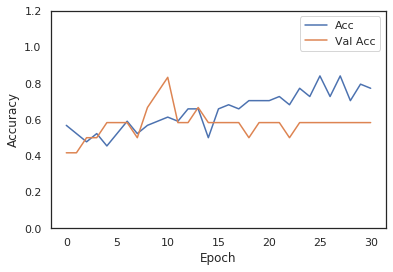

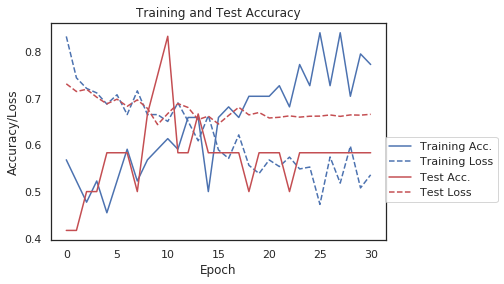

In [0]:
plot_history(history)
plot_training_history(history)


 Classification report 30: 

               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12


 Confusion matrix 30: 

 [[6 0]
 [2 4]]


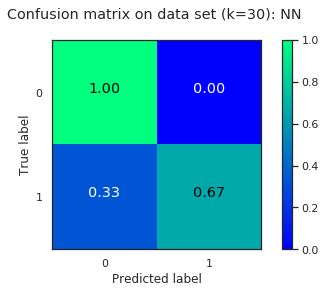

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
ep = history.epoch
ep = np.max(ep)
Y_pred = model.predict(X_tst)
Y_pred1 = np.argmax(Y_pred, axis=1)
Y_tst1 = np.argmax(Y_tst, axis=1)
print("\n Classification report %d: \n\n"%ep, classification_report(Y_tst1, Y_pred1))
print("\n Confusion matrix %d: \n\n"%ep, confusion_matrix(Y_tst1, Y_pred1))
conf_graph(Y_tst1, Y_pred1, Y_tst1, "NN",ep)

In [0]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 18)                666       
_________________________________________________________________
dropout_12 (Dropout)         (None, 18)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 38        
Total params: 704
Trainable params: 704
Non-trainable params: 0
_________________________________________________________________


#### Stratified Cross Validation Neural Network

[ 5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [0 1 2 3 4 8]
[1. 1. 0. 1. 0. 0.]
[INFO] training model...
Train on 50 samples, validate on 6 samples
Epoch 1/30
50/50 [==============================] - 1s 19ms/step - loss: 0.8185 - acc: 0.4400 - val_loss: 0.6892 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6985 - acc: 0.5400 - val_loss: 0.6843 - val_acc: 0.5000
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6993 - acc: 0.5200 - val_loss: 0.6698 - val_acc: 0.5000
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6758 - acc: 0.6200 - val_loss: 0.6653 - val_acc: 0.5000
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6729 - acc: 0.7000 - val_loss: 0.6409 - val_acc: 0.5000
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6531 - acc: 0.7000 

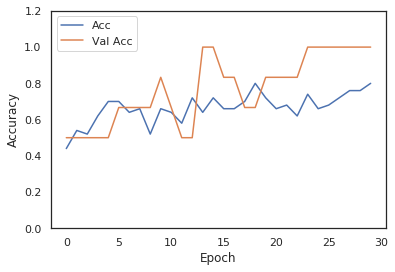

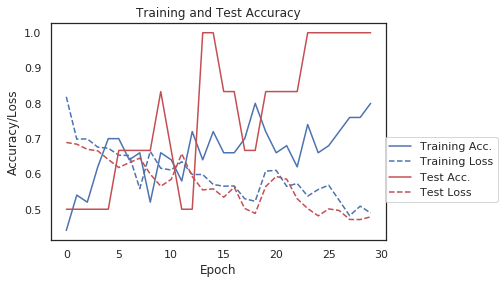


 Classification report 29: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


 Confusion matrix 29: 

 [[3 0]
 [0 3]]


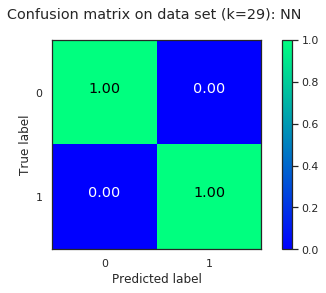


 Next iteration 

[ 0  1  2  3  4  8  9 10 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [ 5  6  7 11 12 13]
[1. 1. 1. 0. 0. 0.]
[INFO] training model...
Train on 50 samples, validate on 6 samples
Epoch 1/30
50/50 [==============================] - 1s 19ms/step - loss: 0.8043 - acc: 0.5800 - val_loss: 0.7564 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6864 - acc: 0.5600 - val_loss: 0.7230 - val_acc: 0.5000
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7058 - acc: 0.5000 - val_loss: 0.7194 - val_acc: 0.5000
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6828 - acc: 0.5600 - val_loss: 0.7033 - val_acc: 0.5000
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6547 - acc: 0.5000 - val_loss: 0.7120 - val_acc: 0.5000
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - lo

<Figure size 432x288 with 0 Axes>

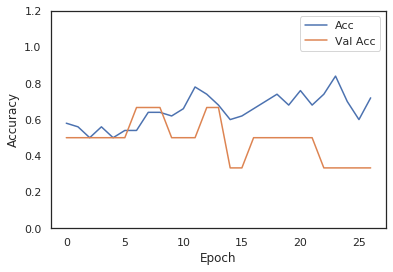

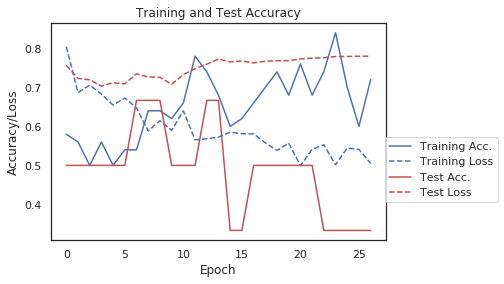


 Classification report 26: 

               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6


 Confusion matrix 26: 

 [[3 0]
 [2 1]]


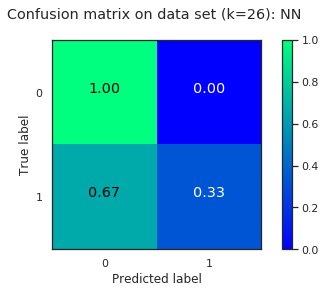


 Next iteration 

[ 0  1  2  3  4  5  6  7  8 11 12 13 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [ 9 10 14 15 16 17]
[1. 1. 0. 0. 0. 1.]
[INFO] training model...
Train on 50 samples, validate on 6 samples
Epoch 1/30
50/50 [==============================] - 1s 20ms/step - loss: 0.7748 - acc: 0.5800 - val_loss: 0.7534 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.7633 - acc: 0.4200 - val_loss: 0.6584 - val_acc: 0.3333
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7312 - acc: 0.4600 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7032 - acc: 0.5000 - val_loss: 0.6874 - val_acc: 0.5000
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7066 - acc: 0.4600 - val_loss: 0.6744 - val_acc: 0.6667
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - lo

<Figure size 432x288 with 0 Axes>

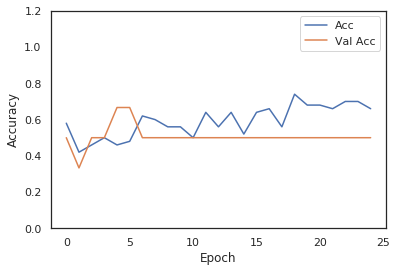

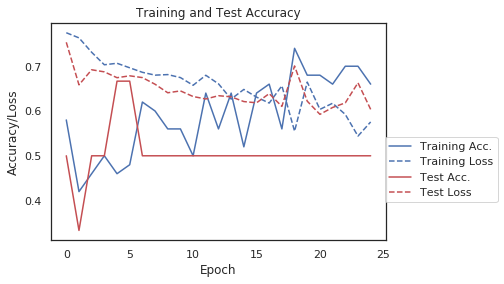


 Classification report 24: 

               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6


 Confusion matrix 24: 

 [[1 2]
 [0 3]]


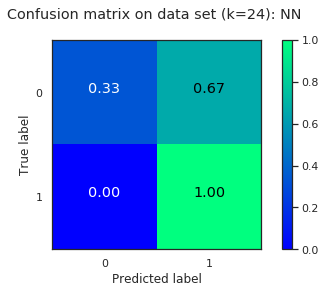


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 23 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [18 19 20 21 22 24]
[0. 1. 1. 0. 1. 0.]
[INFO] training model...
Train on 50 samples, validate on 6 samples
Epoch 1/30
50/50 [==============================] - 1s 22ms/step - loss: 0.8258 - acc: 0.4200 - val_loss: 0.7017 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7371 - acc: 0.5400 - val_loss: 0.6654 - val_acc: 0.5000
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7040 - acc: 0.5000 - val_loss: 0.6793 - val_acc: 0.5000
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6826 - acc: 0.4800 - val_loss: 0.6733 - val_acc: 0.5000
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6807 - acc: 0.5400 - val_loss: 0.6486 - val_acc: 0.6667
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - lo

<Figure size 432x288 with 0 Axes>

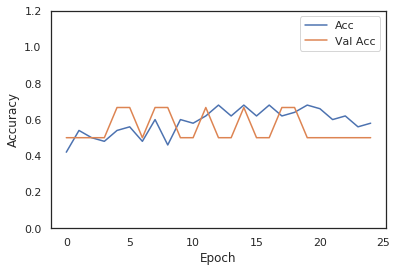

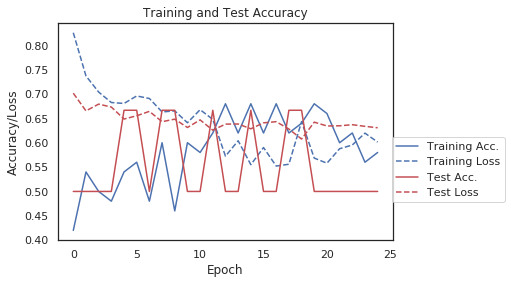


 Classification report 24: 

               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6


 Confusion matrix 24: 

 [[2 1]
 [1 2]]


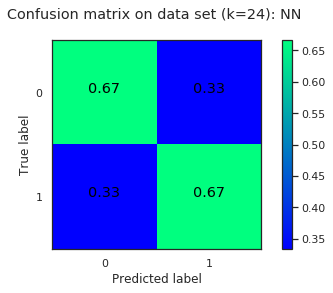


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 28 29 30 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55] [23 25 26 27 31 32]
[1. 0. 0. 0. 1. 1.]
[INFO] training model...
Train on 50 samples, validate on 6 samples
Epoch 1/30
50/50 [==============================] - 1s 23ms/step - loss: 0.7524 - acc: 0.5600 - val_loss: 0.8436 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7263 - acc: 0.5400 - val_loss: 0.8939 - val_acc: 0.3333
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6242 - acc: 0.6600 - val_loss: 0.9014 - val_acc: 0.5000
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6966 - acc: 0.5600 - val_loss: 0.7670 - val_acc: 0.5000
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6219 - acc: 0.6200 - val_loss: 0.8626 - val_acc: 0.5000
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - lo

<Figure size 432x288 with 0 Axes>

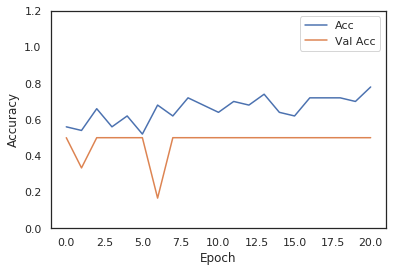

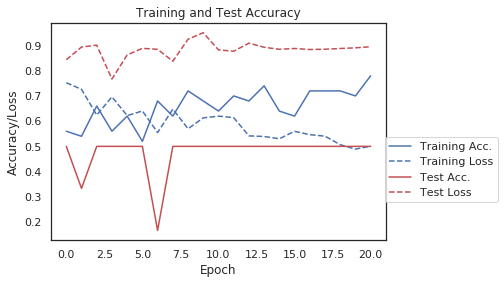


 Classification report 20: 

               precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6


 Confusion matrix 20: 

 [[2 1]
 [2 1]]


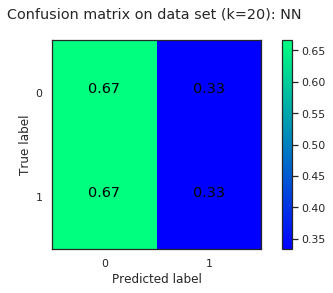


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 31 32 34 35 36 37 38 40 41 43 44 45 46 47 48 49 50 51 52 53
 54 55] [28 29 30 33 39 42]
[0. 0. 0. 1. 1. 1.]
[INFO] training model...
Train on 50 samples, validate on 6 samples
Epoch 1/30
50/50 [==============================] - 1s 23ms/step - loss: 0.9851 - acc: 0.4800 - val_loss: 0.7289 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.8457 - acc: 0.3800 - val_loss: 0.6592 - val_acc: 0.6667
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7320 - acc: 0.4800 - val_loss: 0.6715 - val_acc: 0.6667
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6776 - acc: 0.5400 - val_loss: 0.6535 - val_acc: 0.8333
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6896 - acc: 0.5200 - val_loss: 0.6630 - val_acc: 0.6667
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - lo

<Figure size 432x288 with 0 Axes>

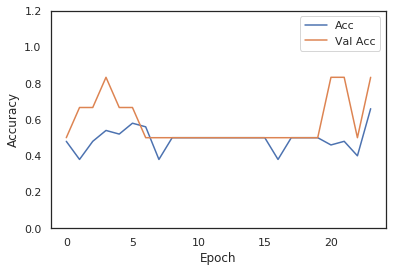

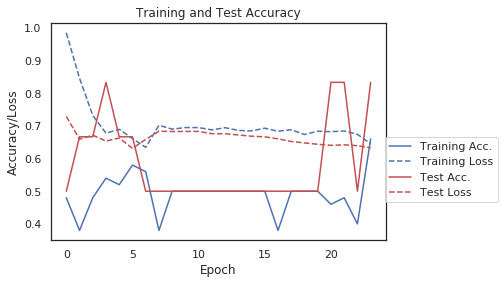


 Classification report 23: 

               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6


 Confusion matrix 23: 

 [[3 0]
 [1 2]]


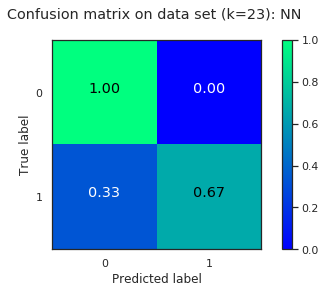


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 37 38 39 40 41 42 44 46 48 49 50 51 52 53
 54 55] [34 35 36 43 45 47]
[0. 0. 0. 1. 1. 1.]
[INFO] training model...
Train on 50 samples, validate on 6 samples
Epoch 1/30
50/50 [==============================] - 1s 26ms/step - loss: 1.0280 - acc: 0.4200 - val_loss: 0.6295 - val_acc: 0.6667
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7341 - acc: 0.5200 - val_loss: 0.6477 - val_acc: 0.5000
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6929 - acc: 0.4400 - val_loss: 0.6597 - val_acc: 0.8333
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6876 - acc: 0.5200 - val_loss: 0.6387 - val_acc: 0.6667
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6861 - acc: 0.5000 - val_loss: 0.6252 - val_acc: 0.8333
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - lo

<Figure size 432x288 with 0 Axes>

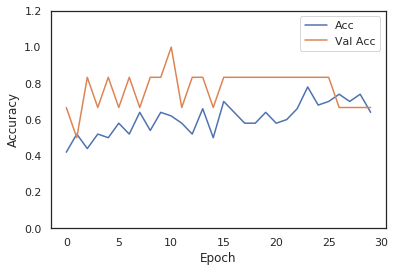

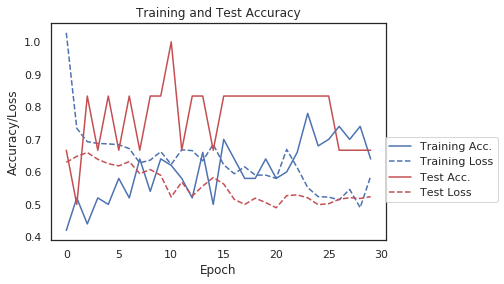


 Classification report 29: 

               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6


 Confusion matrix 29: 

 [[2 1]
 [1 2]]


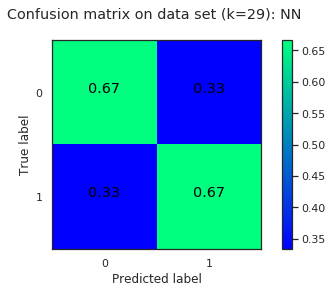


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 39 41 42 43 44 45 46 47 51 52 53
 54 55] [37 38 40 48 49 50]
[0. 0. 0. 1. 1. 1.]
[INFO] training model...
Train on 50 samples, validate on 6 samples
Epoch 1/30
50/50 [==============================] - 1s 26ms/step - loss: 0.8751 - acc: 0.5400 - val_loss: 0.6476 - val_acc: 0.6667
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7088 - acc: 0.5000 - val_loss: 0.7092 - val_acc: 0.3333
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7542 - acc: 0.4400 - val_loss: 0.6908 - val_acc: 0.5000
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.7017 - acc: 0.5000 - val_loss: 0.6829 - val_acc: 0.6667
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6988 - acc: 0.4800 - val_loss: 0.6818 - val_acc: 0.6667
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - lo

<Figure size 432x288 with 0 Axes>

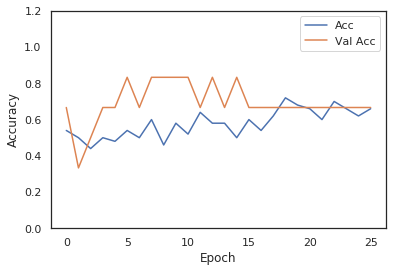

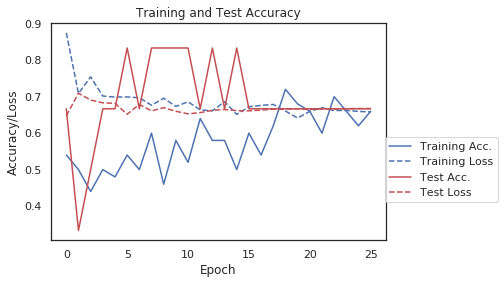


 Classification report 25: 

               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6


 Confusion matrix 25: 

 [[3 0]
 [1 2]]


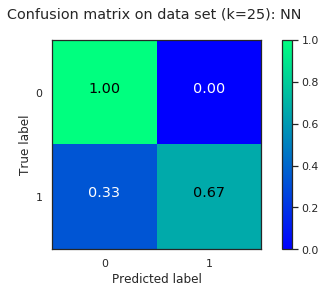


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 45 46 47 48 49
 50 53 54 55] [41 44 51 52]
[0. 0. 1. 1.]
[INFO] training model...
Train on 52 samples, validate on 4 samples
Epoch 1/30
52/52 [==============================] - 1s 26ms/step - loss: 0.8779 - acc: 0.5000 - val_loss: 0.8301 - val_acc: 0.2500
Epoch 2/30
52/52 [==============================] - 0s 3ms/step - loss: 0.7995 - acc: 0.5192 - val_loss: 0.7893 - val_acc: 0.2500
Epoch 3/30
52/52 [==============================] - 0s 3ms/step - loss: 0.6433 - acc: 0.6923 - val_loss: 0.7404 - val_acc: 0.5000
Epoch 4/30
52/52 [==============================] - 0s 3ms/step - loss: 0.6586 - acc: 0.6538 - val_loss: 0.7542 - val_acc: 0.2500
Epoch 5/30
52/52 [==============================] - 0s 3ms/step - loss: 0.6520 - acc: 0.6346 - val_loss: 0.8152 - val_acc: 0.5000
Epoch 6/30
52/52 [==============================] - 0s 3ms/step - loss: 0.

<Figure size 432x288 with 0 Axes>

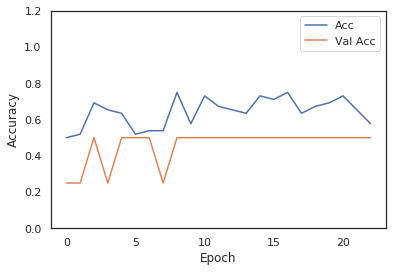

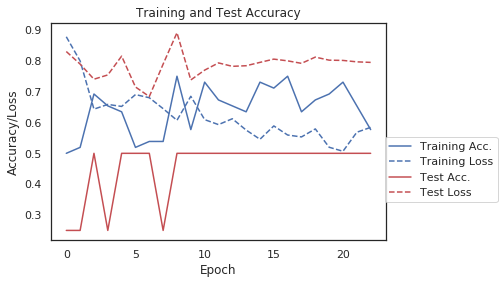


 Classification report 22: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4


 Confusion matrix 22: 

 [[0 2]
 [0 2]]


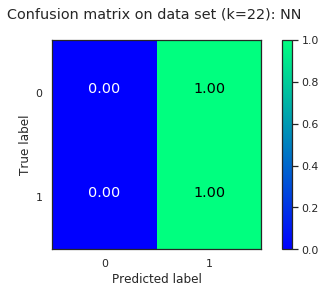


 Next iteration 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52] [46 53 54 55]
[0. 1. 1. 0.]
[INFO] training model...
Train on 52 samples, validate on 4 samples
Epoch 1/30
52/52 [==============================] - 1s 27ms/step - loss: 0.8507 - acc: 0.3846 - val_loss: 0.7186 - val_acc: 0.5000
Epoch 2/30
52/52 [==============================] - 0s 3ms/step - loss: 0.6919 - acc: 0.5385 - val_loss: 0.6952 - val_acc: 0.7500
Epoch 3/30
52/52 [==============================] - 0s 3ms/step - loss: 0.6914 - acc: 0.5192 - val_loss: 0.7057 - val_acc: 0.5000
Epoch 4/30
52/52 [==============================] - 0s 3ms/step - loss: 0.7025 - acc: 0.5192 - val_loss: 0.7001 - val_acc: 0.5000
Epoch 5/30
52/52 [==============================] - 0s 3ms/step - loss: 0.6654 - acc: 0.5577 - val_loss: 0.7877 - val_acc: 0.5000
Epoch 6/30
52/52 [==============================] - 0s 4ms/step - loss: 0.

<Figure size 432x288 with 0 Axes>

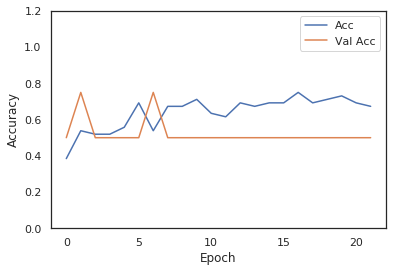

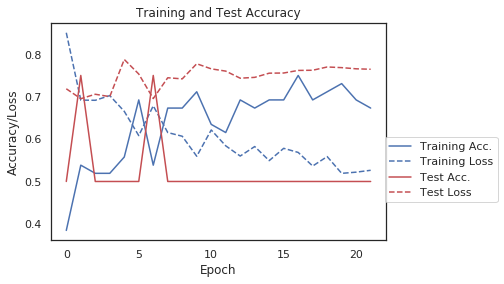


 Classification report 21: 

               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


 Confusion matrix 21: 

 [[1 1]
 [0 2]]


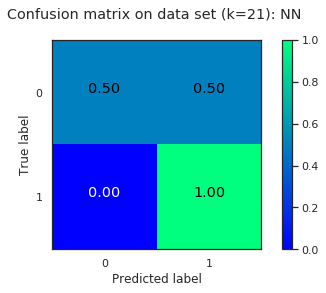


 Next iteration 



<Figure size 432x288 with 0 Axes>

In [0]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
for train, test in skf.split(X, y):
  print("%s %s" % (train, test))
  X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
  print(y_test)
  # one hot encoding
  y_train = np_utils.to_categorical(y_train, 2)
  y_test = np_utils.to_categorical(y_test, 2)
  model = CNN1(36)
  opt = Adam(lr=1e-2)
  model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=['accuracy'])
  early = EarlyStopping(monitor="val_acc", mode="auto", patience=20, restore_best_weights=True)
  reduce = ReduceLROnPlateau(patience=3, factor=0.5, min=1e-8)
  print("[INFO] training model...")
  history=model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=30, batch_size=1, verbose=1, callbacks=[early, reduce])
  plot_history(history)
  plot_training_history(history)
  ep = history.epoch
  ep = np.max(ep)
  Y_pred = model.predict(X_test)
  Y_pred1 = np.argmax(Y_pred, axis=1)
  Y_tst1 = np.argmax(y_test, axis=1)
  print("\n Classification report %d: \n\n"%ep, classification_report(Y_tst1, Y_pred1))
  print("\n Confusion matrix %d: \n\n"%ep, confusion_matrix(Y_tst1, Y_pred1))
  conf_graph(Y_tst1, Y_pred1, Y_tst1, "NN",ep)
  print("\n Next iteration \n")
